# Libraries

In [1]:
import warnings
warnings.filterwarnings( 'ignore' )

In [2]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Built-in libraries
#
import pandas as pd
import numpy  as np


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Visualization libraries
#
import matplotlib.pyplot     as plt
import seaborn               as sns


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# User libraries
#
from utils.Outlier_detection import *

# Import data

In [3]:
%time 

# Load data
#
df = pd.read_csv('Data/6-kanal-1.csv')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 2.86 µs


## Preprocess

In [4]:
# Rename 'created_at' to 'Date
#
df = df.rename(columns = {'created_at':'Date'})

# Set 'Date' as index
#
df['Date'] = df['Date'].astype('datetime64')
df.set_index('Date', inplace=True)

# Remove useless columns
#
del df['entry_id']
del df['latitude']
del df['longitude']
del df['elevation']
del df['status']

df.head(3)

,Temperature,Humidity,PM2.5,PM10,NO2,CO
Date,,,,,,
2022-01-27 16:12:40,26.5,17.0,0.5,0.5,75.0,298.0
2022-01-27 16:12:56,26.7,17.0,0.5,0.5,75.0,298.0
2022-01-27 16:13:13,26.8,17.0,0.5,0.5,76.0,298.0


In [5]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,CO
count,98130.000000,98130.000000,98130.000000,98130.000000,98130.000000,98130.000000
mean,24.186445,15.464944,1.658450,4.432574,141.888964,290.250168
std,1.297529,3.539529,6.275284,17.376964,75.543166,67.987567
min,16.800000,6.000000,0.000000,0.000000,4.000000,107.000000
25%,24.000000,13.000000,0.300000,0.700000,51.000000,247.000000
50%,24.500000,16.000000,0.800000,1.500000,180.000000,270.000000
75%,24.700000,18.000000,1.600000,3.300000,204.000000,310.000000
max,28.700000,27.000000,390.600010,1295.099980,672.000000,736.000000


## Visualization: Scatter plot

Feature:  Temperature
Feature:  Humidity
Feature:  PM2.5
Feature:  PM10
Feature:  NO2
Feature:  CO


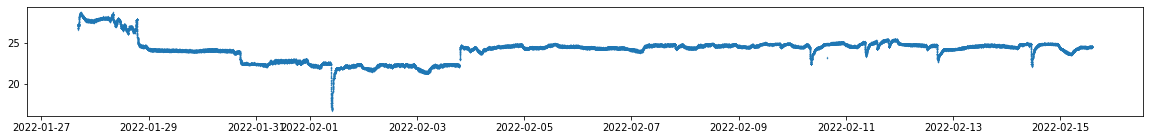

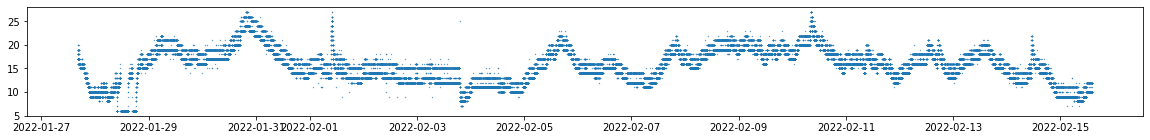

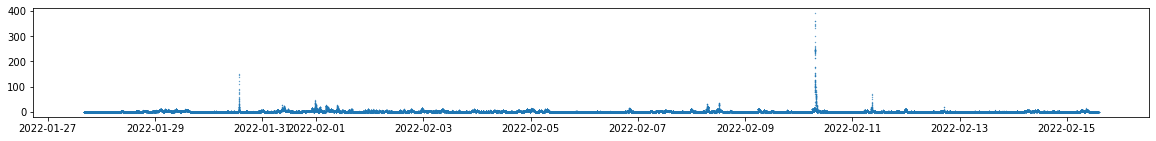

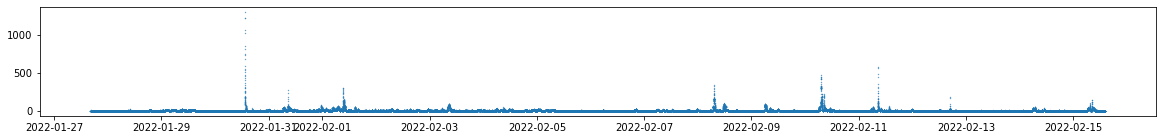

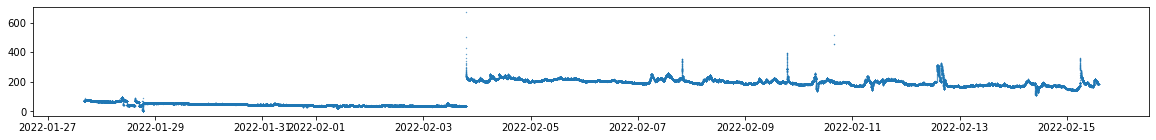

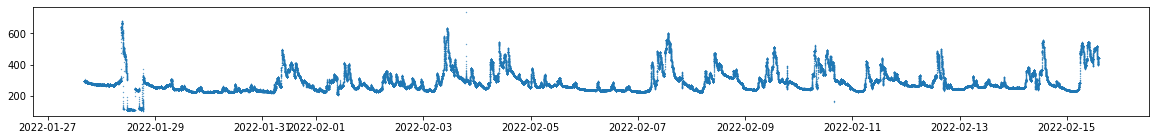

In [6]:
for feature in df.columns:
    print('Feature: ', feature)
    
    plt.figure( figsize=(20, 2))
    plt.scatter(x = df.index, y = df[feature], s = 0.1)

# Data cleaning

## Cleaning process

**Findings**: 

- Remove all records previous 2022-01-29 - Not calibrated sensors
- The NO2 data contain not valid values (< '2020-02-04'). We omit all these data from all variables. Although we should only remove data for NO2
- Data cleaning
    - Feature: Temperature - Method: STD 
    - Feature: Humidity - None
    - Feature: PM2.5 - Method: IQR 
    - Feature: PM10 - Method: IQR 
    - Feature: NO2 - Method: STD 
    - Feature: CO - Method: STD 




In [ ]:
# df = df[(df.index >= '2022-01-29') ]
df = df[(df.index >= '2022-02-04') ]

# Feature: Temperature - Method: STD 
print('Feature: Temperature')
df[ 'Temperature' ] = detect_outliers( df[ 'Temperature' ].to_numpy(), Method = 'STD', verbose = True)

# Feature: Humidity - None

# Feature: PM2.5 - Method: IQR 
print('Feature: PM2.5')
df[ 'PM2.5' ] = detect_outliers( df[ 'PM2.5' ].to_numpy(), Method = 'IQR', verbose = True)

# Feature: PM10 - Method: IQR 
print('Feature: PM10')
df[ 'PM10' ] = detect_outliers( df[ 'PM10' ].to_numpy(), Method = 'IQR', verbose = True)

# Feature: NO2 - Method: STD 
print('Feature: NO2')
df[ 'NO2' ] = detect_outliers( df[ 'NO2' ].to_numpy(), Method = 'STD', verbose = True)


# Feature: CO - Method: STD 
print('Feature: CO')
df[ 'CO' ] = detect_outliers( df[ 'CO' ].to_numpy(), Method = 'STD', verbose = True)

In [47]:
df[-28000:].copy().resample('30s').mean().dropna()

,Temperature,Humidity,PM2.5,PM10,NO2,CO
Date,,,,,,
2022-02-10 04:43:00,24.55,20.0,0.75,2.65,184.0,244.5
2022-02-10 04:43:30,24.50,21.0,0.85,2.40,184.0,245.0
2022-02-10 04:44:00,24.50,21.0,0.45,1.80,183.5,245.0
2022-02-10 04:44:30,24.55,20.5,0.75,3.05,184.0,244.0
2022-02-10 04:45:00,24.50,20.0,0.80,2.20,184.0,245.0
...,...,...,...,...,...,...
2022-02-15 14:10:00,24.50,11.0,0.25,0.65,184.5,443.5
2022-02-15 14:10:30,24.50,10.0,0.20,0.50,185.0,443.0
2022-02-15 14:11:00,24.50,10.0,0.10,0.15,184.0,443.0


## Visualization

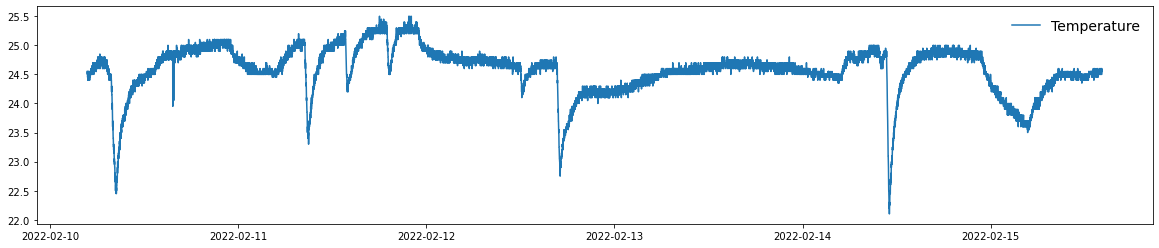

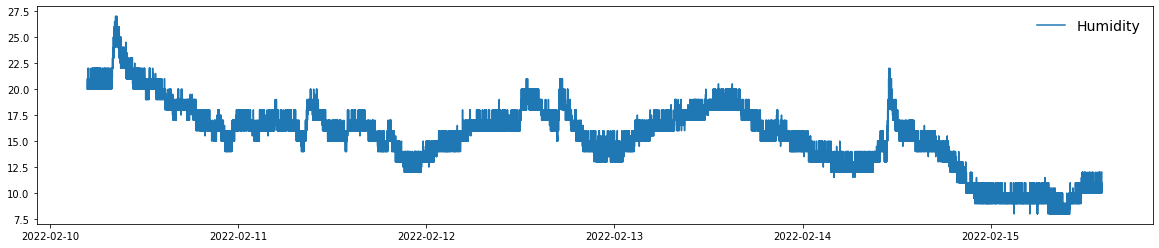

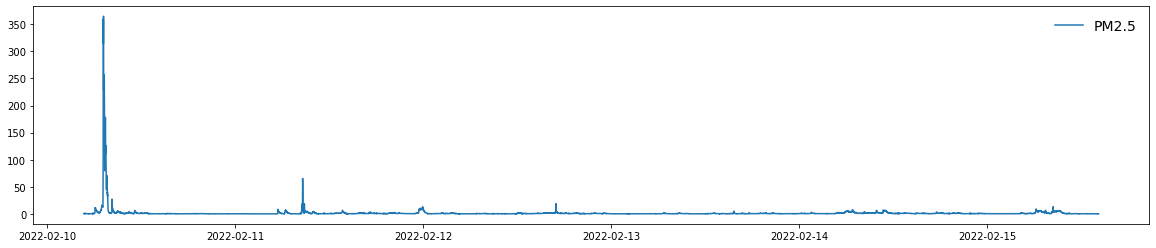

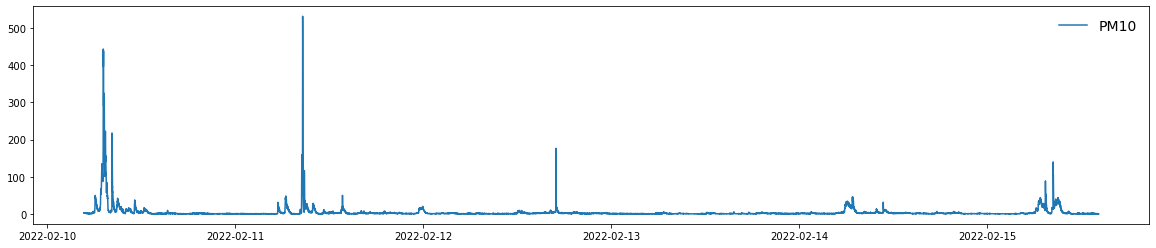

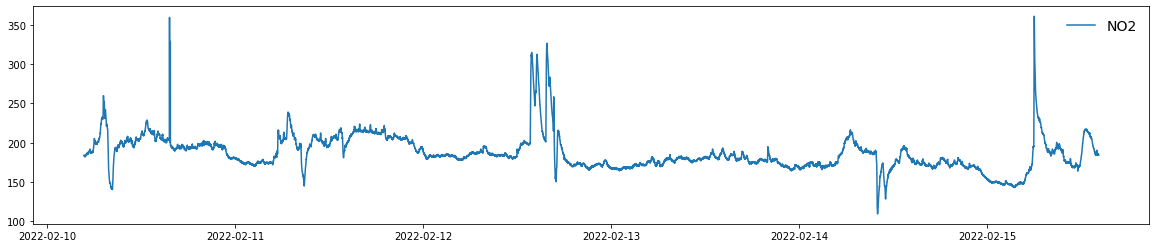

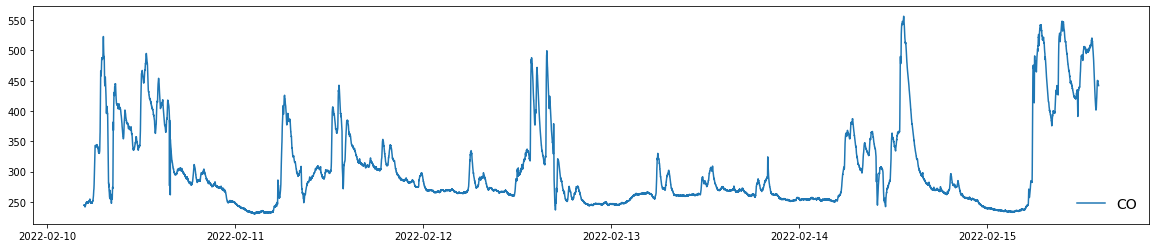

In [49]:
# for feature in df.columns:
#     df1 = df[-30000:-25000].copy()
    
#     plt.figure( figsize=(20, 4) )
#     plt.scatter(x = df1.index, y = df1[feature], s = 1)
#     plt.legend([ feature ], frameon = False, fontsize = 14)

for feature in df.columns:
    df1 = df[-28000:].copy().resample('30s').mean()
    
    plt.figure( figsize=(20, 4) )
#     plt.scatter(x = df1.index, y = df1[feature], s = 1)
    plt.plot(df1.index, df1[feature])
    plt.legend([ feature ], frameon = False, fontsize = 14)
    
    

# Save data

In [ ]:
try:
    df.to_csv('metadata/6-kanal-1.csv')

    print('[INFO] Data have been successfully saved')
except:
    print('[ERROR] Data have been saved')